In [126]:
import requests
import json
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
from config import api_key

pd.options.display.float_format = "{:,.2f}".format

allmovies_df = pd.read_csv("allmoviesdata.csv")
allmovies_df["Director"]=allmovies_df["Director"].astype('string')
allmovies_df

,Movie ID,Rank,Title,Production Budget,Domestic Gross,Worldwide Gross,Main Genre,2nd Genre,3rd Genre,IMDB Rating,Studio,Worldwide_gross,Year,IMDb ID,Director
0,0,48,Black Panther,"200,000,000.00","700,059,566.00","1,336,494,320.00",Action,Adventure,Drama,7.40,Walt Disney Pictures,"$700,059,566",2018,NaN,Ryan Coogler
1,1,5,Avengers: Infinity War,"300,000,000.00","678,815,482.00","2,048,359,754.00",Action,Adventure,Sci-Fi,8.50,Walt Disney Pictures,"$678,815,482",2018,NaN,"Anthony Russo, Joe Russo"
2,2,50,Incredibles 2,"200,000,000.00","608,581,744.00","1,242,805,359.00",Animation,Action,Adventure,7.80,Pixar,"$608,581,744",2018,NaN,Brad Bird
3,3,144,Jurassic World: Fallen Kingdom,"170,000,000.00","417,719,760.00","1,308,323,302.00",Action,Adventure,Drama,6.20,Universal Pictures,"$416,769,345",2018,NaN,J.A. Bayona
4,4,11,Solo: A Star Wars Story,"275,000,000.00","213,767,512.00","393,151,347.00",Action,Adventure,Drama,7.00,Walt Disney Pictures,"$213,767,512",2018,NaN,Ron Howard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,204,"4,918",Annie Hall,"4,000,000.00","38,251,425.00","38,251,425.00",Romance,Drama,Comedy,8.10,Metro-Goldwyn-Mayer,"$38,251,425.00",1977,tt0075686,Woody Allen
217,205,"2,387",The Omen,"25,000,000.00","54,607,383.00","119,295,584.00",Thriller,Horror,Drama,7.60,20th Century Fox,"$60,922,980.00",1976,tt0075005,Richard Donner
218,206,44,King Kong,"207,000,000.00","218,080,025.00","550,517,357.00",Horror,Fantasy,Adventure,5.80,Paramount Pictures,"$52,614,445.00",1976,tt0074751,John Guillermin
219,207,445,Midway,"100,000,000.00","56,846,802.00","126,815,030.00",History,Drama,Action,6.70,Universal Pictures,"$43,220,000.00",1976,tt0074899,Jack Smight


In [127]:
#Creating a dataframe of directors, their budget, and gross for thier movies
directormoviecount = allmovies_df.groupby(["Director"]).count()["Title"]
directorbudget = allmovies_df.groupby(["Director"]).mean()[("Production Budget")]
directordomestic = allmovies_df.groupby(["Director"]).mean()["Domestic Gross"]
directorworldwide = allmovies_df.groupby(["Director"]).mean()["Worldwide Gross"]
directors_df = pd.DataFrame({"Number of Movies":directormoviecount,
                            "Average Budget": (directorbudget/1000000),
                            "Average Domestic Gross": (directordomestic/1000000),
                            "Average Worldwide Gross": (directorworldwide/1000000)})
directors_df["Average Budget"] = directors_df["Average Budget"].astype(float)
directors_df["Average Domestic Gross"] = directors_df["Average Domestic Gross"].astype(float)
directors_df["Average Worldwide Gross"] = directors_df["Average Worldwide Gross"].astype(float)

#Dataframe of top directors based on the number of movies that they made
moviedirect_df = directors_df.sort_values("Number of Movies", ascending=False)
moviedirect_df = moviedirect_df.head(10)

#Dataframe of top directors based the average budget
budgdirect_df = directors_df.sort_values("Average Budget", ascending=False)
budgdirect_df = budgdirect_df.head(10)

### Directors and the number of movies that they have made and their gross outcome

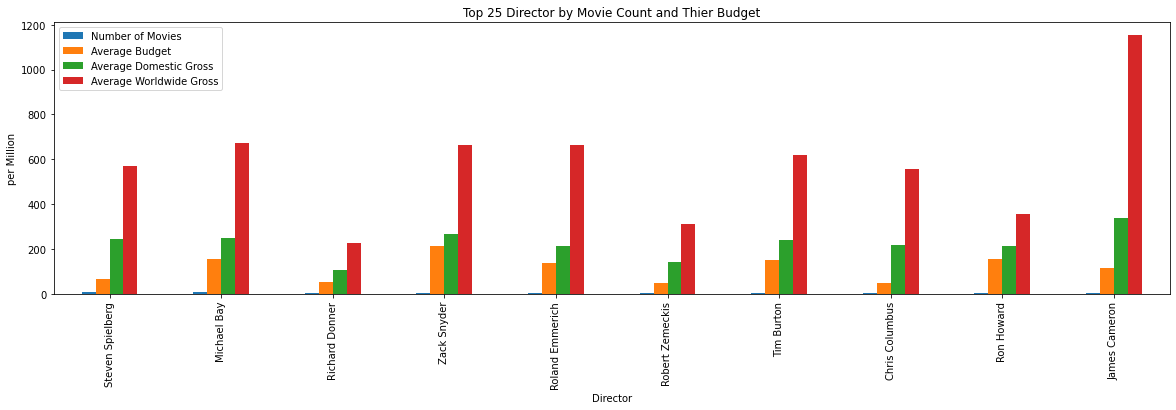

In [129]:
moviecountbar = moviedirect_df.plot.bar(xlabel="Director", ylabel="per Million", 
            title = "Top 25 Director by Movie Count and Thier Budget", figsize=(20,5))

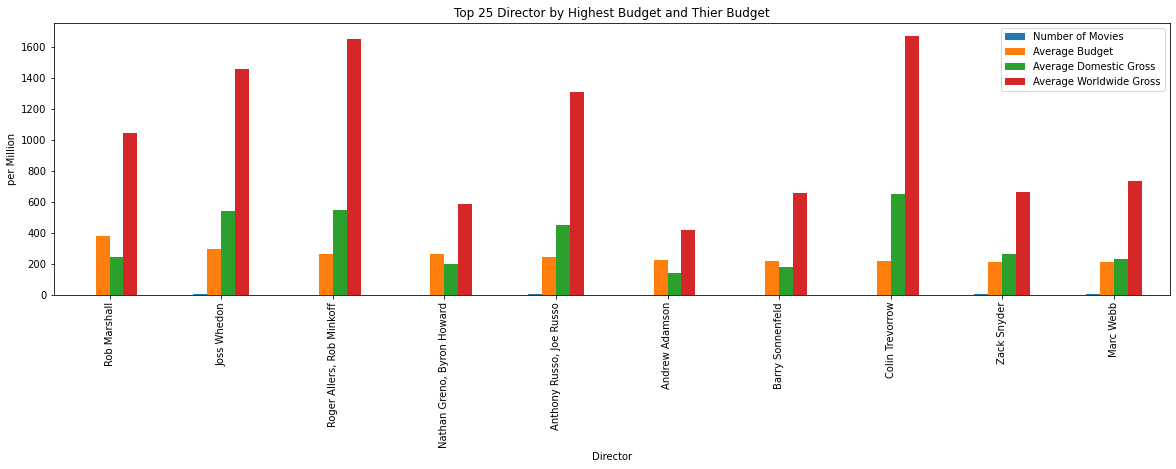

In [130]:
budgetbar = budgdirect_df.plot.bar(xlabel="Director", ylabel="per Million", 
            title = "Top 25 Director by Highest Budget and Thier Budget", figsize=(20,5))